In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

In [3]:
!pwd

/home/durrmeyer/Scripts/Notebooks


In [44]:
path_AE_metrics = "../../Results/AE_tif_mixed_bright/metrics_AE.csv"
path_image_info = "../../Results/AE_tif_mixed_bright/image_list.csv"

In [45]:
AE_metrics = pd.read_csv(path_AE_metrics, index_col=0)
list_images = pd.read_csv(path_image_info, index_col=0)

In [46]:
AE_metrics.head(3)

,normalization,standardization,image_type,channel_image,image_resize_x,image_resize_y,Image_path,autoencoder_name,prediction_interation,prediction_size,...,gini_latent_space,kurtois_latent_space,entropy_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start,SSIM_compared_to_start,MSE_compared_to_previous_step,latent_distance_to_previous_step,SSIM_compared_to_previous_step
0,True,True,RGB,ALL,NaN,NaN,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,0.0,128.0,...,0.208666,-0.290257,-inf,-0.062343,0.000817,0.001623,0.0,0.000817,0.001623,0.0
1,True,True,RGB,ALL,NaN,NaN,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,1.0,128.0,...,0.237757,-0.495719,-inf,-0.082150,0.001837,0.006039,0.0,0.000364,0.001481,0.0
2,True,True,RGB,ALL,NaN,NaN,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,2.0,128.0,...,0.249531,-0.607644,-inf,-0.101951,0.003533,0.013641,0.0,0.000374,0.001622,0.0


In [47]:
list_images.head(3)

,Image_path,filename,type,folder,habitat,color_control,tv_loss,layers,sex,fish_n,species,img_width,img_height,image_extension
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,punctulatum,6543,2213,.jpg
1,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_TUQU_M01.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,M,1.0,punctulatum,6352,2140,.jpg
2,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F04.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,4.0,punctulatum,6662,2078,.jpg


In [48]:
merged = list_images.merge(AE_metrics, on=["Image_path"], how='inner')
merged.head(3)

,Image_path,filename,type,folder,habitat,color_control,tv_loss,layers,sex,fish_n,...,gini_latent_space,kurtois_latent_space,entropy_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start,SSIM_compared_to_start,MSE_compared_to_previous_step,latent_distance_to_previous_step,SSIM_compared_to_previous_step
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,...,0.208666,-0.290257,-inf,-0.062343,0.000817,0.001623,0.0,0.000817,0.001623,0.0
1,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,...,0.237757,-0.495719,-inf,-0.082150,0.001837,0.006039,0.0,0.000364,0.001481,0.0
2,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,original fish,punctulatum,not_listed,NaN,NaN,NaN,F,2.0,...,0.249531,-0.607644,-inf,-0.101951,0.003533,0.013641,0.0,0.000374,0.001622,0.0


In [49]:
print(merged.columns)

Index(['Image_path', 'filename', 'type', 'folder', 'habitat', 'color_control',
       'tv_loss', 'layers', 'sex', 'fish_n', 'species', 'img_width',
       'img_height', 'image_extension', 'normalization', 'standardization',
       'image_type', 'channel_image', 'image_resize_x', 'image_resize_y',
       'autoencoder_name', 'prediction_interation', 'prediction_size',
       'gini_pxl_space', 'kurtois_pxl_space', 'entropy_pxl_space',
       'gini_latent_space', 'kurtois_latent_space', 'entropy_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start', 'SSIM_compared_to_start',
       'MSE_compared_to_previous_step', 'latent_distance_to_previous_step',
       'SSIM_compared_to_previous_step'],
      dtype='object')


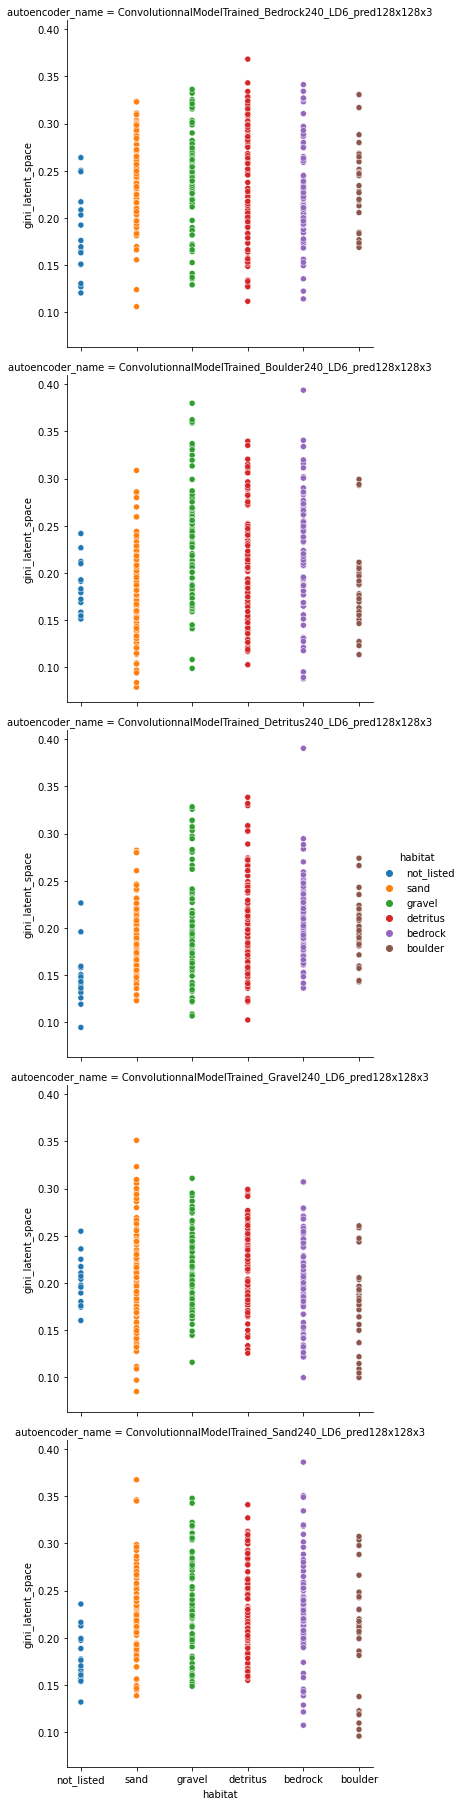

In [179]:
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", hue="habitat", y="gini_latent_space", row="autoencoder_name")

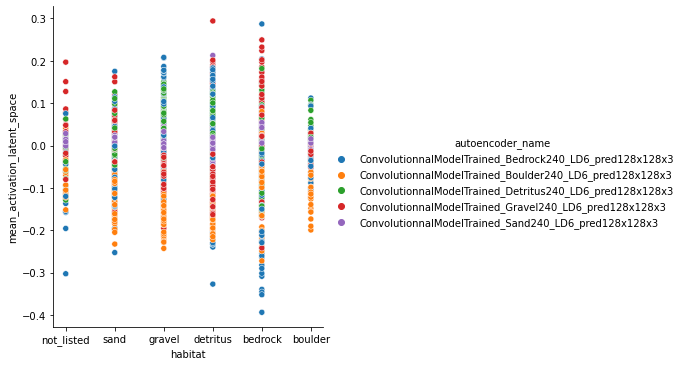

In [57]:
%matplotlib inline
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="mean_activation_latent_space", hue="autoencoder_name")

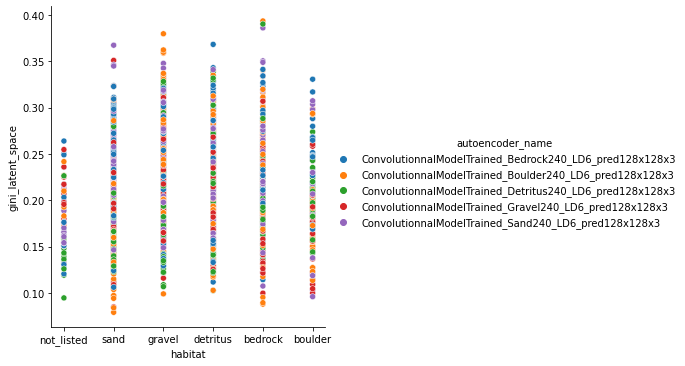

In [58]:
%matplotlib inline
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="gini_latent_space", hue="autoencoder_name")

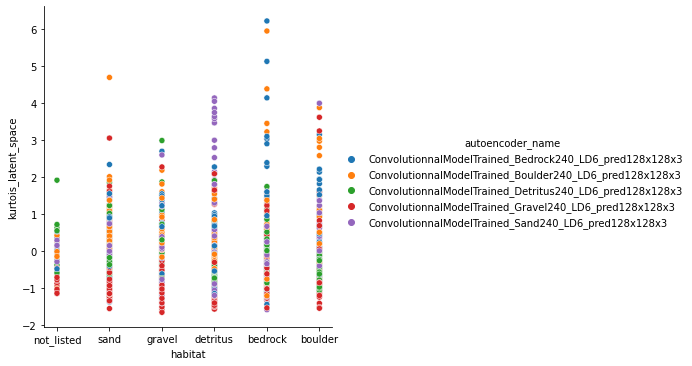

In [59]:
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="kurtois_latent_space", hue="autoencoder_name")

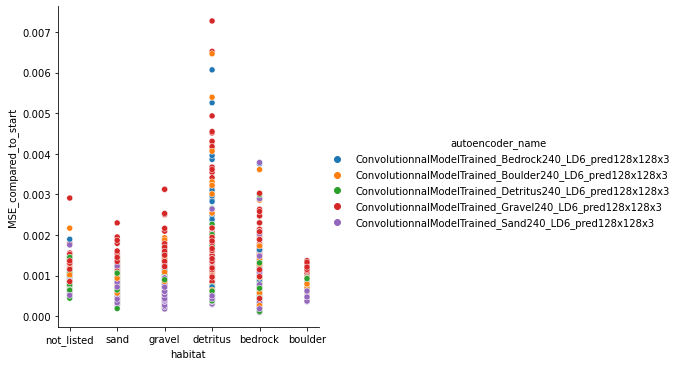

In [60]:
f=sns.relplot(data=merged.loc[merged["prediction_interation"]==0], 
            x="habitat", y="MSE_compared_to_start", hue="autoencoder_name")

In [80]:
data = merged.loc[merged["prediction_interation"]==0][['Image_path', 'filename', 
       'folder', 'habitat',
       'sex', 'fish_n', 'species',
       'autoencoder_name',
       'gini_latent_space', 'kurtois_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start']]
data.head()

,Image_path,filename,folder,habitat,sex,fish_n,species,autoencoder_name,gini_latent_space,kurtois_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,punctulatum,not_listed,F,2.0,punctulatum,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,0.208666,-0.290257,-0.062343,0.000817,0.001623
50,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,punctulatum,not_listed,F,2.0,punctulatum,ConvolutionnalModelTrained_Boulder240_LD6_pred...,0.181361,-0.093098,-0.123126,0.000794,0.000655
100,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,punctulatum,not_listed,F,2.0,punctulatum,ConvolutionnalModelTrained_Detritus240_LD6_pre...,0.134489,-0.663062,0.022757,0.001005,0.001702
150,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,punctulatum,not_listed,F,2.0,punctulatum,ConvolutionnalModelTrained_Gravel240_LD6_pred1...,0.217178,-1.149850,-0.007306,0.001289,0.001415
200,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,PUNC_MASS_F02.jpg,punctulatum,not_listed,F,2.0,punctulatum,ConvolutionnalModelTrained_Sand240_LD6_pred128...,0.197397,-0.419902,0.030701,0.000631,0.000756


In [129]:
one_hot_data = pd.get_dummies(data.drop(columns=["filename", "folder"]), columns=["habitat", "sex"])
one_hot_data = one_hot_data.drop(columns=["sex_F", "sex_0"])
one_hot_data.head()

,Image_path,fish_n,species,autoencoder_name,gini_latent_space,kurtois_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start,habitat_bedrock,habitat_boulder,habitat_detritus,habitat_gravel,habitat_not_listed,habitat_sand,sex_M
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,0.208666,-0.290257,-0.062343,0.000817,0.001623,0,0,0,0,1,0,0
50,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Boulder240_LD6_pred...,0.181361,-0.093098,-0.123126,0.000794,0.000655,0,0,0,0,1,0,0
100,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Detritus240_LD6_pre...,0.134489,-0.663062,0.022757,0.001005,0.001702,0,0,0,0,1,0,0
150,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Gravel240_LD6_pred1...,0.217178,-1.149850,-0.007306,0.001289,0.001415,0,0,0,0,1,0,0
200,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Sand240_LD6_pred128...,0.197397,-0.419902,0.030701,0.000631,0.000756,0,0,0,0,1,0,0


In [134]:
columns_numbers=[
       'gini_latent_space', 'kurtois_latent_space',
       'mean_activation_latent_space', 'MSE_compared_to_start',
       'latent_distance_to_start']
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = one_hot_data.copy()
data_scaled[columns_numbers] = min_max_scaler.fit_transform(data_scaled[columns_numbers])
data_scaled.head()

,Image_path,fish_n,species,autoencoder_name,gini_latent_space,kurtois_latent_space,mean_activation_latent_space,MSE_compared_to_start,latent_distance_to_start,habitat_bedrock,habitat_boulder,habitat_detritus,habitat_gravel,habitat_not_listed,habitat_sand,sex_M
0,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Bedrock240_LD6_pred...,0.412083,0.173773,0.481855,0.100320,0.092795,0,0,0,0,1,0,0
50,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Boulder240_LD6_pred...,0.325300,0.198763,0.393475,0.097182,0.032795,0,0,0,0,1,0,0
100,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Detritus240_LD6_pre...,0.176324,0.126519,0.605590,0.126540,0.097728,0,0,0,0,1,0,0
150,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Gravel240_LD6_pred1...,0.439138,0.064819,0.561877,0.166143,0.079885,0,0,0,0,1,0,0
200,/home/durrmeyer/Images/Poissons/JPEG Cropped/p...,2.0,punctulatum,ConvolutionnalModelTrained_Sand240_LD6_pred128...,0.376269,0.157340,0.617140,0.074422,0.039054,0,0,0,0,1,0,0


<AxesSubplot:>

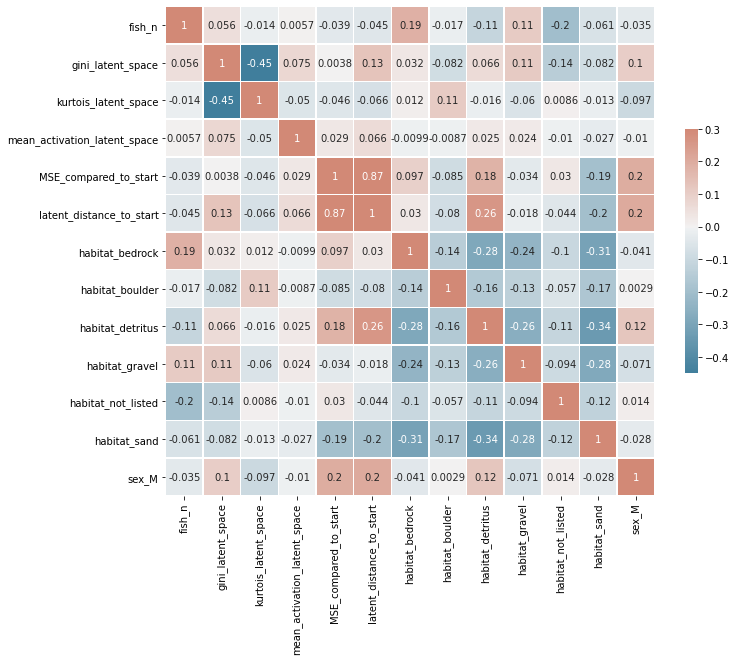

In [135]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data_scaled.corr()
#custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Is the mse from a prediction correlated to the habitat?

In [185]:
col_mse="MSE_compared_to_start"
habitats=["sand", "boulder", "bedrock", "detritus", "gravel"]
for hab in habitats:
    data_hab = data[data["habitat"]==hab]
    data_hab_normalized = data_hab

MSE_compared_to_start                                                 \
species            barrenense caeruleum camurum chlorosomum gracile olmstedi   
0                         NaN       NaN     NaN         NaN     NaN      NaN   
50                        NaN       NaN     NaN         NaN     NaN      NaN   
100                       NaN       NaN     NaN         NaN     NaN      NaN   
150                       NaN       NaN     NaN         NaN     NaN      NaN   
200                       NaN       NaN     NaN         NaN     NaN      NaN   
...                       ...       ...     ...         ...     ...      ...   
102000                    NaN       NaN     NaN         NaN     NaN      NaN   
102050                    NaN       NaN     NaN         NaN     NaN      NaN   
102100                    NaN       NaN     NaN         NaN     NaN      NaN   
102150                    NaN       NaN     NaN         NaN     NaN      NaN   
102200                    NaN       NaN     NaN         NaN     NaN      NaN   

                                                             
species punctulatum pyrrhogaster    swaini zonale zonistium  
0          0.000817          NaN       NaN    NaN       NaN  
50         0.000794          NaN       NaN    NaN       NaN  
100        0.001005          NaN       NaN    NaN       NaN  
150        0.001289          NaN       NaN    NaN       NaN  
200        0.000631          NaN       NaN    NaN       NaN  
...             ...          ...       ...    ...       ...  
102000          NaN          NaN  0.000721    NaN       NaN  
102050          NaN          NaN  0.000647    NaN       NaN  
102100          NaN          NaN  0.000621    NaN       NaN  
102150          NaN          NaN  0.001186    NaN       NaN  
102200          NaN          NaN  0.000502    NaN       NaN  

[2045 rows x 11 columns]